In [1]:
import datetime
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
stock = pd.read_csv("./stock.csv")
stock

,일자,종목코드,종목명,거래량,시가,고가,저가,종가
0,20210601,A060310,3S,166690,2890,2970,2885,2920
1,20210601,A095570,AJ네트웍스,63836,5860,5940,5750,5780
2,20210601,A006840,AK홀딩스,103691,35500,35600,34150,34400
3,20210601,A054620,APS,462544,14600,14950,13800,14950
4,20210601,A265520,AP시스템,131987,29150,29150,28800,29050
...,...,...,...,...,...,...,...,...
987995,20230530,A189980,흥국에프엔비,272284,3005,3035,2955,2980
987996,20230530,A000540,흥국화재,50218,3250,3255,3195,3215
987997,20230530,A003280,흥아해운,130664,1344,1395,1340,1370
987998,20230530,A037440,희림,141932,9170,9260,9170,9200


In [3]:
stock.columns = ['Date', 'Code', 'Name', 'Volume', 'Open', 'High', 'Low','Close']

In [4]:
stock['Name'].value_counts()

3S         494
유화증권       494
이녹스        494
이노테라피      494
이노와이어리스    494
          ... 
바이브컴퍼니     494
바이넥스       494
바른손이앤에이    494
바른손        494
힘스         494
Name: Name, Length: 2000, dtype: int64

In [5]:
stock_AJ = stock[stock['Code']=='A189980']
stock_AJ = stock_AJ [['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
stock_AJ

,Date,Open,High,Low,Close,Volume
1995,20210601,3885,4010,3850,3970,737919
3995,20210602,4030,4260,3980,4055,2769931
5995,20210603,4030,4070,3910,3990,676718
7995,20210604,3990,3990,3915,3930,348161
9995,20210607,3910,3930,3810,3845,396319
...,...,...,...,...,...,...
979995,20230523,2985,3150,2950,3035,1797571
981995,20230524,3005,3120,2990,3060,781382
983995,20230525,3080,3120,3050,3085,556467
985995,20230526,3085,3090,2985,3000,361608


In [6]:
stock_AJ['Date'].value_counts()

20210601    1
20221017    1
20221013    1
20221012    1
20221011    1
           ..
20220120    1
20220119    1
20220118    1
20220117    1
20230530    1
Name: Date, Length: 494, dtype: int64

In [7]:
def MinMaxScaler(data):
    """최솟값과 최댓값을 이용하여 0 ~ 1 값으로 변환"""
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # 0으로 나누기 에러가 발생하지 않도록 매우 작은 값(1e-7)을 더해서 나눔
    return numerator / (denominator + 1e-7)

In [8]:
dfx = stock_AJ[['Open','High','Low','Volume', 'Close']]
dfx = MinMaxScaler(dfx)
dfy = dfx[['Close']]
dfx = dfx[['Open','High','Low','Volume']]
dfx

,Open,High,Low,Volume
1995,0.681553,0.632224,0.717694,0.015323
3995,0.737864,0.719790,0.769384,0.060642
5995,0.737864,0.653240,0.741551,0.013958
7995,0.722330,0.625219,0.743539,0.006631
9995,0.691262,0.604203,0.701789,0.007705
...,...,...,...,...
979995,0.332039,0.330998,0.359841,0.038956
981995,0.339806,0.320490,0.375746,0.016293
983995,0.368932,0.320490,0.399602,0.011277
985995,0.370874,0.309982,0.373757,0.006931


In [9]:
dfx.describe()

,Open,High,Low,Volume
count,494.000000,494.000000,494.000000,494.000000
mean,0.459066,0.419018,0.479797,0.027173
std,0.236273,0.224148,0.234934,0.083361
min,0.000000,0.000000,0.000000,0.000000
25%,0.262136,0.227671,0.278827,0.003099
50%,0.415534,0.378284,0.437376,0.006455
75%,0.664078,0.609457,0.695825,0.017243
max,1.000000,1.000000,1.000000,1.000000


In [10]:
# 두 데이터를 리스트 형태로 저장
X = dfx.values.tolist()
y = dfy.values.tolist()

In [11]:
window_size = 10

data_X = []
data_y = []
for i in range(len(y) - window_size):
    _X = X[i : i + window_size] # 다음 날 종가(i+windows_size)는 포함되지 않음
    _y = y[i + window_size]     # 다음 날 종가
    data_X.append(_X)
    data_y.append(_y)
print(_X, "->", _y)

[[0.26019417474717693, 0.20840630472124672, 0.2604373757351715, 0.004190895440065868], [0.22135922329237442, 0.21891418563156168, 0.2604373757351715, 0.007717828577650264], [0.2524271844562164, 0.22767075305682416, 0.2842942345811414, 0.005574665048737578], [0.2796116504745782, 0.22591943957177166, 0.29821073557462385, 0.0040754809455799046], [0.2660194174653973, 0.23642732048208662, 0.29622266400412633, 0.006230910749268878], [0.2873786407655387, 0.3169877407945013, 0.3200795228500963, 0.06818025955392808], [0.3320388349385616, 0.3309982486749213, 0.3598409542600461, 0.03895601601565115], [0.33980582522952213, 0.3204903677646063, 0.37574552682402607, 0.016292646018125193], [0.36893203882062403, 0.3204903677646063, 0.39960238566999595, 0.011276520215746353], [0.37087378639336416, 0.30998248685429136, 0.37375745525352855, 0.00693071287641488]] -> [0.3154121863686232]


In [12]:
print('전체 데이터의 크기 :', len(data_X), len(data_y))

전체 데이터의 크기 : 484 484


In [13]:
train_size = int(len(data_y) * 0.7)
train_X = np.array(data_X[0 : train_size])
train_y = np.array(data_y[0 : train_size])

test_size = len(data_y) - train_size
test_X = np.array(data_X[train_size : len(data_X)])
test_y = np.array(data_y[train_size : len(data_y)])

print('훈련 데이터의 크기 :', train_X.shape, train_y.shape)
print('테스트 데이터의 크기 :', test_X.shape, test_y.shape)

훈련 데이터의 크기 : (338, 10, 4) (338, 1)
테스트 데이터의 크기 : (146, 10, 4) (146, 1)


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RNN, SimpleRNN

# RNN 모델 초기화
model = Sequential()

# 첫 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu', input_shape=(train_X.shape[1:]), return_sequences=True))
model.add(Dropout(0.5))

# 두 번째 RNN 레이어와 Dropout 레이어 추가
model.add(SimpleRNN(20, activation='relu'))
model.add(Dropout(0.3))

# 최종 출력을 위한 Dense 레이어 추가
model.add(Dense(1))

# 모델 요약 출력
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 20)            500       
                                                                 
 dropout_1 (Dropout)         (None, 10, 20)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 20)                820       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 1341 (5.24 KB)
Trainable params: 1341 (5.24 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# LSTM 모델 초기화
model = Sequential()

# 첫 번째 LSTM 레이어와 Dropout 레이어 추가
model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(10, 4)))
model.add(Dropout(0.1))

# 두 번째 LSTM 레이어와 Dropout 레이어 추가
model.add(LSTM(units=20, activation='relu'))
model.add(Dropout(0.1))

# 출력층 유닛 1
model.add(Dense(units=1))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 10, 20)            2000      
                                                                 
 dropout_3 (Dropout)         (None, 10, 20)            0         
                                                                 
 lstm_2 (LSTM)               (None, 20)                3280      
                                                                 
 dropout_4 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 5301 (20.71 KB)
Trainable params: 5301 (20.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(train_X, train_y, epochs=70, batch_size=30)
pred_y = model.predict(test_X)

Epoch 1/70
12/12 [==============================] - 2s 4ms/step - loss: 0.3422
Epoch 2/70
12/12 [==============================] - 0s 4ms/step - loss: 0.2539
Epoch 3/70
12/12 [==============================] - 0s 5ms/step - loss: 0.1870
Epoch 4/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0873
Epoch 5/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0272
Epoch 6/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0188
Epoch 7/70
12/12 [==============================] - 0s 4ms/step - loss: 0.0186
Epoch 8/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0147
Epoch 9/70
12/12 [==============================] - 0s 4ms/step - loss: 0.0167
Epoch 10/70
12/12 [==============================] - 0s 4ms/step - loss: 0.0179
Epoch 11/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0177
Epoch 12/70
12/12 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 13/70
12/12 [==============================

In [19]:
model.evaluate(test_X, test_y)

5/5 [==============================] - 0s 2ms/step - loss: 0.0021


0.0020948457531630993

In [20]:
y_pred = model.predict(test_X)

5/5 [==============================] - 0s 2ms/step


In [21]:
mse = tf.reduce_mean(tf.square(test_y - y_pred))

print(f'MSE: {mse.numpy()}')

MSE: 0.002094845862975763


In [22]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(pred_y, test_y))
print('평균제곱근오차', mse)

평균제곱근오차 0.04576948615590701


5/5 [==============================] - 0s 2ms/step


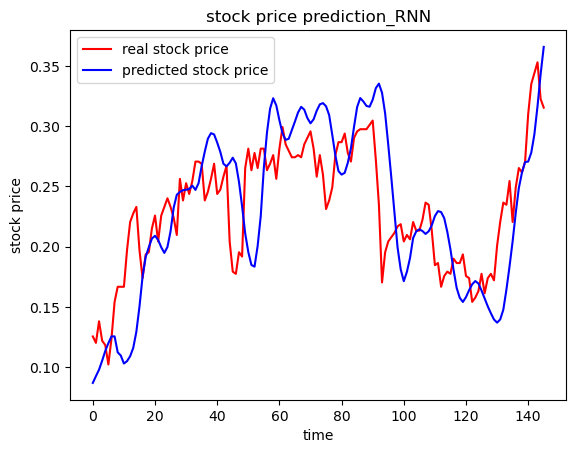

In [24]:
#RNN
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction_RNN')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()

5/5 [==============================] - 0s 2ms/step


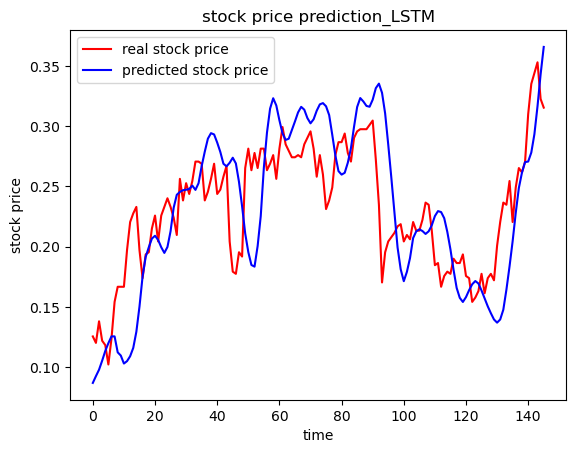

In [26]:
#LSTM
pred_y = model.predict(test_X)

plt.figure()
plt.plot(test_y, color='red', label='real stock price')
plt.plot(pred_y, color='blue', label='predicted stock price')
plt.title('stock price prediction_LSTM')
plt.xlabel('time')
plt.ylabel('stock price')
plt.legend()
plt.show()